In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [3]:
dynamics_loss_sw = {
    'CAE+ReZero+Fix': [0.08392556011676788, 0.0838504210114479, 0.08409005403518677, 0.08457501232624054, 0.0853324830532074, 0.08640342950820923, 0.08765572309494019, 0.08907506614923477, 0.0906728133559227, 0.09233815968036652],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/sw/CAE-h32_k5/ReZero-default/20240110-170545/finetune_main.log
    
    'CAE+NeuralODE+Fix': [0.08392520248889923, 0.08389297127723694, 0.08415406942367554, 0.08460691571235657, 0.08528098464012146, 0.08622763305902481, 0.08732427656650543, 0.08856236189603806, 0.08995371311903, 0.0913219004869461],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/sw/CAE-h32_k5/NeuralODE-no_exp/20240128-152744/finetune_main.log
    
    'AEflow+ReZero+Fix': [0.06383852660655975, 0.06371115148067474, 0.06378155201673508, 0.06405971944332123, 0.06461982429027557, 0.06536165624856949, 0.0662570670247078, 0.06726627051830292, 0.06842541694641113, 0.06974372267723083],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/sw/AEflow-b4_k5/ReZero-default/20240110-172158/finetune_main.log
    
    'AEflow+NeuralODE+Fix': [0.06371239572763443, 0.06357461959123611, 0.06359472870826721, 0.0637919157743454, 0.06424007564783096, 0.06483854353427887, 0.06558167934417725, 0.0664115622639656, 0.0673849880695343, 0.0685233473777771],
    # bicmr:/home/lizhuoyuan/MyProject/LAINR-simplified/src/outputs/finetune/sw/AEflow-b4_k5/NeuralODE-no_exp/20240126-133317/finetune_main.log
    
    'SINR+ReZero+Fix': [0.04149487614631653, 0.04231119900941849, 0.0437474325299263, 0.04552344232797623, 0.047998473048210144, 0.05096376687288284, 0.054199062287807465, 0.057585474103689194, 0.060987669974565506, 0.06456941366195679],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/sw/SINRv11-default/20240108-160737/finetune_main.log
    
    # 'SINR+ReZero+Exp': [0.041495028883218765, 0.042294424027204514, 0.043708670884370804, 0.04544002562761307, 0.04782490432262421, 0.05069243535399437, 0.05387059226632118, 0.05719646066427231, 0.06054164841771126, 0.06401557475328445],
    
    'SINR+NeuralODE+Fix (LAINR, ours)': [0.04151865839958191, 0.04226435720920563, 0.0426100417971611, 0.043098412454128265, 0.04360879585146904, 0.04447316378355026, 0.04540926590561867, 0.046348508447408676, 0.04725115746259689, 0.04829796403646469],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/sw/SINRv11-default/20240110-141408/finetune_main.log
    
    'SINR+NeuralODE+Exp (ours)': [0.04140832647681236, 0.04194425791501999, 0.04239504039287567, 0.04279609024524689, 0.043436579406261444, 0.044307950884103775, 0.04524698853492737, 0.04617873951792717, 0.04715621471405029, 0.04832004755735397],
    # bicmr:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/sw/SINRv11-default/NeuralODE-ratio0.999_lr0.001/20240129-001626/finetune_main.log
    
    # 'constant': [0.0, 0.014406256377696991, 0.02734861522912979, 0.039823755621910095, 0.05242381989955902, 0.06482894718647003, 0.07694625854492188, 0.08883220702409744, 0.1003720760345459, 0.11161071062088013],
}
dynamics_loss_era5 = {
    # 'CAE+ReZero+Fix': [0.09407757, 0.09387212, 0.09645709, 0.10094981, 0.1077134, 0.1167926, 0.12853757, 0.14227398, 0.15840785, 0.17692846], #! remove the last prediction
    'CAE+ReZero+Fix': [0.07877232879400253, 0.07918570190668106, 0.08048239350318909, 0.08212298899888992, 0.08442912250757217, 0.08682721108198166, 0.08972037583589554, 0.0925968587398529, 0.0958169549703598, 0.09901110827922821],
    # dasheshi:/gpfs/share/home/2001110031/MyProjects/LAINR-simplified/src/outputs/finetune/ERA5v00/CAE-h32_k5/ReZero-default/20240125-013352/finetune_main.log
    
    'CAE+NeuralODE+Fix': [0.07928857207298279, 0.0802219957113266, 0.08304175734519958, 0.0867685005068779, 0.0913797989487648, 0.0961756706237793, 0.10131115466356277, 0.10622762143611908, 0.11130319535732269, 0.11616342514753342],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/ERA5v00/CAE-h32_k5/NeuralODE-no_exp/20240129-092706/finetune_main.log
    
    'AEflow+ReZero+Fix': [0.10565173625946045, 0.10582463443279266, 0.10652948170900345, 0.10738034546375275, 0.10870659351348877, 0.1100715696811676, 0.111826591193676, 0.11353901028633118, 0.11555420607328415, 0.11754772067070007],
    # dasheshi:/gpfs/share/home/2001110031/MyProjects/LAINR-simplified/src/outputs/finetune/ERA5v00/AEflow-b4_k5/ReZero-default/20240120-154923/finetune_main.log
    
    'AEflow+NeuralODE+Fix': [0.10563884675502777, 0.10599661618471146, 0.10729531943798065, 0.10902867466211319, 0.11144272238016129, 0.11422096937894821, 0.11759135872125626, 0.12108555436134338, 0.12502844631671906, 0.12898238003253937],
    # V100x3:/home/lizhuoyuan/MyProjects/LAINR-simplified/src/outputs/finetune/ERA5v00/AEflow-b4_k5/NeuralODE-no_exp/20240126-231347/finetune_main.log
    
    'SINR+NeuralODE+Fix (LAINR, ours)': [0.0782720148563385, 0.07861801981925964, 0.07969321310520172, 0.08106330782175064, 0.08296538889408112, 0.08499769866466522, 0.08744166791439056, 0.08986590057611465, 0.09258729964494705, 0.09527447074651718],
    # bicmr:/home/lizhuoyuan/MyProject/AutoDLresults/AutoDL/src/outputs/finetune/ERA5v00/SINRv11-default/NeuralODE-no_exp/20240118-233730/finetune_main.log
    
    # 'SINR(1024)+NeuralODE+Fix (LAINR, ours)': [0.05412543937563896, 0.056349169462919235, 0.06179288029670715, 0.06865426152944565, 0.07637451589107513, 0.08398029208183289, 0.09164024144411087, 0.09884428232908249, 0.1059582307934761, 0.11275410652160645],  # ! ongoing

    # 'SINR(1024)+ReZero+Fix (LAINR, ours)': [0.05415186285972595, 0.056281112134456635, 0.06149546056985855, 0.068061463534832, 0.07544757425785065, 0.0826788991689682, 0.0899445191025734, 0.09671653807163239, 0.10336707532405853, 0.10968317836523056],

    # 'SINR(1024)+NeuralODEh1536+Fix (LAINR, ours)': [0.05411107465624809, 0.05639592930674553, 0.061969928443431854, 0.06900200992822647, 0.07690946757793427, 0.08472248166799545, 0.09261962026357651, 0.10007985681295395, 0.10745271295309067, 0.1145450621843338]
}

# dynamics_loss_era5['CAE*']=dynamics_loss_era5['CAE+ReZero+Fix']
# dynamics_loss_era5['AEflow*']=dynamics_loss_era5['AEflow+ReZero+Fix']
# dynamics_loss_era5['SINR* (LAINR, ours)'] = dynamics_loss_era5['SINR+NeuralODE+Fix (LAINR, ours)']
# dynamics_loss_era5['SINR(1024)* (LAINR, ours)'] = dynamics_loss_era5['SINR(1024)+NeuralODE+Fix (LAINR, ours)']

In [4]:
dfs = []

eds = ['CAE', 'AEflow', 'SINR(1024)', 'SINR']
lds = ['ReZero', 'NeuralODE']

for key, dyns in dynamics_loss_sw.items():
    d = {}
    for k, v in enumerate(dyns):
        d['model'] = key,
        d['dataset'] = 'shallow-water'
        d['step'] = k
        d['dynamics loss (RMSE)'] = v

        for ed in eds:
            if ed in key:
                d['ROM'] = ed
                break
        for ld in lds:
            if ld in key:
                d['latent model'] = ld
                break

        dfs.append(pd.DataFrame.from_dict(d))
for key, dyns in dynamics_loss_era5.items():
    d = {}
    for k, v in enumerate(dyns):
        d['model'] = key,
        d['dataset'] = 'ERA5'
        d['step'] = k
        d['dynamics loss (RMSE)'] = v

        for ed in eds:
            if ed in key:
                d['ROM'] = ed
                break
        for ld in lds:
            if ld in key:
                d['latent model'] = ld
                break

        dfs.append(pd.DataFrame.from_dict(d))
df = pd.concat(dfs)
df

,model,dataset,step,dynamics loss (RMSE),ROM,latent model
0,CAE+ReZero+Fix,shallow-water,0,0.083926,CAE,ReZero
0,CAE+ReZero+Fix,shallow-water,1,0.083850,CAE,ReZero
0,CAE+ReZero+Fix,shallow-water,2,0.084090,CAE,ReZero
0,CAE+ReZero+Fix,shallow-water,3,0.084575,CAE,ReZero
0,CAE+ReZero+Fix,shallow-water,4,0.085332,CAE,ReZero
...,...,...,...,...,...,...
0,"SINR+NeuralODE+Fix (LAINR, ours)",ERA5,5,0.084998,SINR,NeuralODE
0,"SINR+NeuralODE+Fix (LAINR, ours)",ERA5,6,0.087442,SINR,NeuralODE
0,"SINR+NeuralODE+Fix (LAINR, ours)",ERA5,7,0.089866,SINR,NeuralODE
0,"SINR+NeuralODE+Fix (LAINR, ours)",ERA5,8,0.092587,SINR,NeuralODE


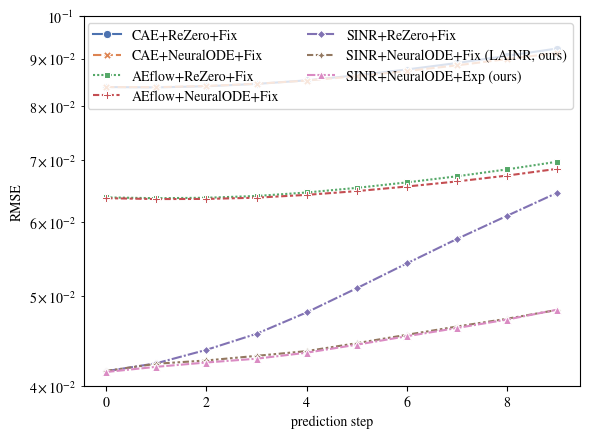

In [5]:
df_sw = df[df['dataset'] == 'shallow-water']
ax = sns.lineplot(data=df_sw, x='step', y='dynamics loss (RMSE)',
                  hue='model', style='model',
                  markers=True, palette='deep')
ax.set_xlabel('prediction step')
ax.set_yscale('log')
ax.set_ylabel('RMSE')
ax.set_ylim(.04, .1)
ax.legend(fontsize=10, loc='upper right', ncol=2)
# plt.savefig('dynamics_loss-sw.pdf', bbox_inches='tight')

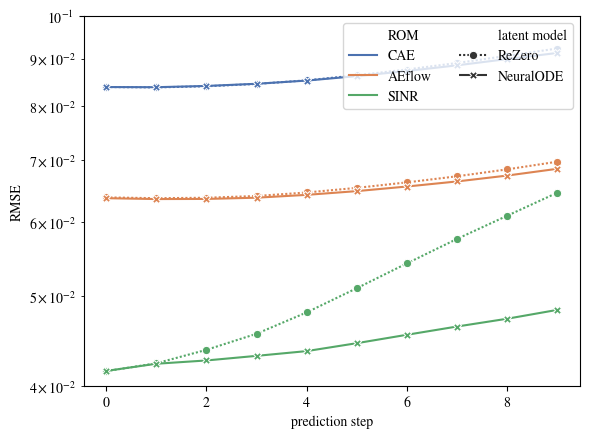

In [6]:
df_sw = df[df['dataset'] == 'shallow-water']
df_sw = df_sw[df_sw['model'].apply(lambda x: 'Fix' in x)]
df_sw['model'] = df_sw['model'].apply(lambda x: x.replace('+Fix', ''))
ax = sns.lineplot(data=df_sw, x='step', y='dynamics loss (RMSE)',
                  hue='ROM', style='latent model', dashes=[(1, 1), (1, 0)],
                  markers=True, palette='deep')
ax.set_xlabel('prediction step')
ax.set_yscale('log')
ax.set_ylabel('RMSE')
ax.set_ylim(.04, .1)
ax.legend(fontsize=10, loc='upper right', ncol=2)
plt.savefig('dynamics_loss-sw.pdf', bbox_inches='tight')

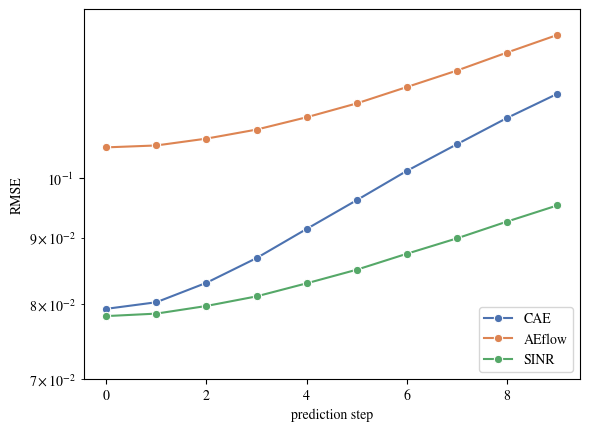

In [18]:
df_era5 = df[df['dataset'] == 'ERA5']
df_era5 = df_era5[df_era5['model'].apply(lambda x: 'NeuralODE' in x)]
ax = sns.lineplot(data=df_era5, x='step', y='dynamics loss (RMSE)',
                  hue='ROM',marker='o', palette='deep')
ax.set_xlabel('prediction step')
ax.set_yscale('log')
ax.set_ylabel('RMSE')
ax.set_ylim(.07, .135)
ax.legend(fontsize=10, loc='lower right')
plt.savefig('dynamics_loss-era5-neuralode.pdf', bbox_inches='tight')

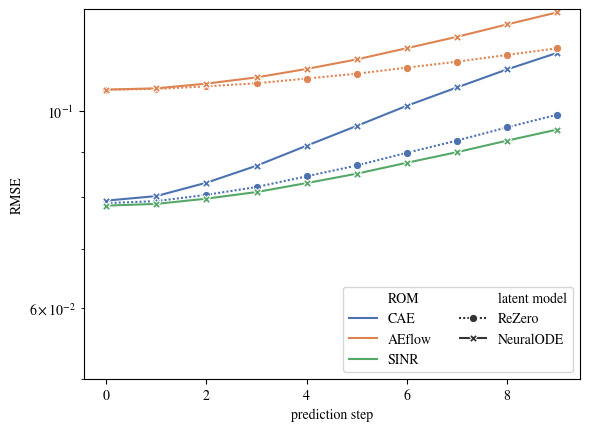

In [8]:
df_era5 = df[df['dataset'] == 'ERA5']
# df_era5 = df_era5[df_era5['model'].apply(lambda x: '*' in x)]
ax = sns.lineplot(data=df_era5, x='step', y='dynamics loss (RMSE)',
                  hue='ROM', style='latent model', dashes=[(1, 1), (1, 0)],
                  markers=True, palette='deep')
ax.set_xlabel('prediction step')
ax.set_yscale('log')
ax.set_ylabel('RMSE')
ax.set_ylim(.05, .13)
ax.legend(fontsize=10, loc='lower right', ncol=2)
# plt.savefig('dynamics_loss-era5.pdf', bbox_inches='tight')